<a href="https://colab.research.google.com/github/AdvaithK500/student0/blob/main/lab1/PT_Part1_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center">
  <td align="center"><a target="_blank" href="http://introtodeeplearning.com">
        <img src="https://i.ibb.co/Jr88sn2/mit.png" style="padding-bottom:5px;" />
      Visit MIT Deep Learning</a></td>
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/MITDeepLearning/introtodeeplearning/blob/master/lab1/PT_Part1_Intro.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/MITDeepLearning/introtodeeplearning/blob/master/lab1/PT_Part1_Intro.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

# Copyright Information


In [1]:
# Copyright 2025 MIT Introduction to Deep Learning. All Rights Reserved.
#
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of MIT Introduction
# to Deep Learning must reference:
#
# © MIT Introduction to Deep Learning
# http://introtodeeplearning.com
#

# Lab 1: Intro to PyTorch and Music Generation with RNNs

In this lab, you'll get exposure to using PyTorch and learn how it can be used for deep learning. Go through the code and run each cell. Along the way, you'll encounter several ***TODO*** blocks -- follow the instructions to fill them out before running those cells and continuing.


# Part 1: Intro to PyTorch

## 0.1 Install PyTorch

[PyTorch](https://pytorch.org/) is a popular deep learning library known for its flexibility and ease of use. Here we'll learn how computations are represented and how to define a simple neural network in PyTorch. For all the labs in Introduction to Deep Learning 2025, there will be a PyTorch version available.

Let's install PyTorch and a couple of dependencies.

In [2]:
import torch
import torch.nn as nn

# Download and import the MIT Introduction to Deep Learning package
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 41.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.6/775.6 kB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 155.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.1/278.1 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.9 MB/s eta 0:00:00


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## 1.1 What is PyTorch?

PyTorch is a machine learning library, like TensorFlow. At its core, PyTorch provides an interface for creating and manipulating [tensors](https://pytorch.org/docs/stable/tensors.html), which are data structures that you can think of as multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base datatypes such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions. PyTorch provides the ability to perform computation on these tensors, define neural networks, and train them efficiently.

The [```shape```](https://pytorch.org/docs/stable/generated/torch.Tensor.shape.html#torch.Tensor.shape) of a PyTorch tensor defines its number of dimensions and the size of each dimension. The `ndim` or [```dim```](https://pytorch.org/docs/stable/generated/torch.Tensor.dim.html#torch.Tensor.dim) of a PyTorch tensor provides the number of dimensions (n-dimensions) -- this is equivalent to the tensor's rank (as is used in TensorFlow), and you can also think of this as the tensor's order or degree.

Let’s start by creating some tensors and inspecting their properties:


In [3]:
integer = torch.tensor(1234)
decimal = torch.tensor(3.14159265359)

print(f"`integer` is a {integer.ndim}-d Tensor: {integer}")
print(f"`decimal` is a {decimal.ndim}-d Tensor: {decimal}")


`integer` is a 0-d Tensor: 1234
`decimal` is a 0-d Tensor: 3.1415927410125732


Vectors and lists can be used to create 1-d tensors:

In [4]:
fibonacci = torch.tensor([1, 1, 2, 3, 5, 8])
count_to_100 = torch.tensor(range(100))

print(f"`fibonacci` is a {fibonacci.ndim}-d Tensor with shape: {fibonacci.shape}")
print(f"`count_to_100` is a {count_to_100.ndim}-d Tensor with shape: {count_to_100.shape}")


`fibonacci` is a 1-d Tensor with shape: torch.Size([6])
`count_to_100` is a 1-d Tensor with shape: torch.Size([100])


Next, let’s create 2-d (i.e., matrices) and higher-rank tensors. In image processing and computer vision, we will use 4-d Tensors with dimensions corresponding to batch size, number of color channels, image height, and image width.

In [7]:
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor'''
matrix = torch.tensor([[1,2,3], [4,5,6]])

assert isinstance(matrix, torch.Tensor), "matrix must be a torch Tensor object"
assert matrix.ndim == 2

'''TODO: Define a 4-d Tensor.'''
# Use torch.zeros to initialize a 4-d Tensor of zeros with size 10 x 3 x 256 x 256.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = torch.zeros(size=(10, 3, 256, 256))


assert isinstance(images, torch.Tensor), "images must be a torch Tensor object"
assert images.ndim == 4, "images must have 4 dimensions"
assert images.shape == (10, 3, 256, 256), "images is incorrect shape"
print(f"images is a {images.ndim}-d Tensor with shape: {images.shape}")

images is a 4-d Tensor with shape: torch.Size([10, 3, 256, 256])


As you have seen, the `shape` of a tensor provides the number of elements in each tensor dimension. The `shape` is quite useful, and we'll use it often. You can also use slicing to access subtensors within a higher-rank tensor:

In [8]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print(f"`row_vector`: {row_vector}")
print(f"`column_vector`: {column_vector}")
print(f"`scalar`: {scalar}")

`row_vector`: tensor([4, 5, 6])
`column_vector`: tensor([2, 5])
`scalar`: 2


## 1.2 Computations on Tensors

A convenient way to think about and visualize computations in a machine learning framework like PyTorch is in terms of graphs. We can define this graph in terms of tensors, which hold data, and the mathematical operations that act on these tensors in some order. Let's look at a simple example, and define this computation using PyTorch:

![alt text](https://raw.githubusercontent.com/MITDeepLearning/introtodeeplearning/2025/lab1/img/add-graph.png)

In [9]:
# Create the nodes in the graph and initialize values
a = torch.tensor(15)
b = torch.tensor(61)

# Add them!
c1 = torch.add(a, b)
c2 = a + b  # PyTorch overrides the "+" operation so that it is able to act on Tensors
print(f"c1: {c1}")
print(f"c2: {c2}")


c1: 76
c2: 76


Notice how we've created a computation graph consisting of PyTorch operations, and how the output is a tensor with value 76 -- we've just created a computation graph consisting of operations, and it's executed them and given us back the result.

Now let's consider a slightly more complicated example:

![alt text](https://raw.githubusercontent.com/MITDeepLearning/introtodeeplearning/2025/lab1/img/computation-graph.png)

Here, we take two inputs, `a, b`, and compute an output `e`. Each node in the graph represents an operation that takes some input, does some computation, and passes its output to another node.

Let's define a simple function in PyTorch to construct this computation function:

In [10]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a, b):
    '''TODO: Define the operation for c, d, e.'''
    c = a + b
    d = b - 1
    e = c * d
    return e


Now, we can call this function to execute the computation graph given some inputs `a,b`:

In [11]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a, b)
print(f"e_out: {e_out}")

e_out: 6.0


Notice how our output is a tensor with value defined by the output of the computation, and that the output has no shape as it is a single scalar value.

## 1.3 Neural networks in PyTorch
We can also define neural networks in PyTorch. PyTorch uses [``torch.nn.Module``](https://pytorch.org/docs/stable/generated/torch.nn.Module.html), which serves as a base class for all neural network modules in PyTorch and thus provides a framework for building and training neural networks.

Let's consider the example of a simple perceptron defined by just one dense (aka fully-connected or linear) layer: $ y = \sigma(Wx + b) $, where $W$ represents a matrix of weights, $b$ is a bias, $x$ is the input, $\sigma$ is the sigmoid activation function, and $y$ is the output.

![alt text](https://raw.githubusercontent.com/MITDeepLearning/introtodeeplearning/2025/lab1/img/computation-graph-2.png)

We will use `torch.nn.Module` to define layers -- the building blocks of neural networks. Layers implement common neural networks operations. In PyTorch, when we implement a layer, we subclass `nn.Module` and define the parameters of the layer as attributes of our new class. We also define and override a function [``forward``](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.forward), which will define the forward pass computation that is performed at every step. All classes subclassing `nn.Module` should override the `forward` function.

Let's write a dense layer class to implement a perceptron defined above.

In [16]:
### Defining a dense layer ###

# num_inputs: number of input nodes
# num_outputs: number of output nodes
# x: input to the layer

class OurDenseLayer(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(OurDenseLayer, self).__init__()
        # Define and initialize parameters: a weight matrix W and bias b
        # Note that the parameter initialize is random!
        self.W = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
        self.bias = torch.nn.Parameter(torch.randn(num_outputs))

    def forward(self, x):
        '''TODO: define the operation for z (hint: use torch.matmul).'''
        z = torch.matmul(x,self.W) + self.bias

        '''TODO: define the operation for out (hint: use torch.sigmoid).'''
        y = torch.sigmoid(z)
        return y


Now, let's test the output of our layer.

In [17]:
# Define a layer and test the output!
num_inputs = 2
num_outputs = 3
layer = OurDenseLayer(num_inputs, num_outputs)
x_input = torch.tensor([[1, 2.]])
y = layer(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.0020, 0.7364, 0.1056]], grad_fn=<SigmoidBackward0>)


Conveniently, PyTorch has defined a number of ```nn.Modules``` (or Layers) that are commonly used in neural networks, for example a [```nn.Linear```](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) or [`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) module.

Now, instead of using a single ```Module``` to define our simple neural network, we'll use the  [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) module from PyTorch and a single [`nn.Linear` ](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layer to define our network. With the `Sequential` API, you can readily create neural networks by stacking together layers like building blocks.

In [18]:
### Defining a neural network using the PyTorch Sequential API ###

# define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 3

# Define the model
'''TODO: Use the Sequential API to define a neural network with a
    single linear (dense!) layer, followed by non-linearity to compute z'''
model = nn.Sequential(
    nn.Linear(n_input_nodes, n_output_nodes),
    nn.Sigmoid()
)


We've defined our model using the Sequential API. Now, we can test it out using an example input:

In [19]:
# Test the model with example input
x_input = torch.tensor([[1, 2.]])
model_output = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.0020, 0.7364, 0.1056]], grad_fn=<SigmoidBackward0>)


With PyTorch, we can create more flexible models by subclassing [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). The `nn.Module` class allows us to group layers together flexibly to define new architectures.

As we saw earlier with `OurDenseLayer`, we can subclass `nn.Module` to create a class for our model, and then define the forward pass through the network using the `forward` function. Subclassing affords the flexibility to define custom layers, custom training loops, custom activation functions, and custom models. Let's define the same neural network model as above (i.e., Linear layer with an activation function after it), now using subclassing and using PyTorch's built in linear layer from `nn.Linear`.

In [22]:
### Defining a model using subclassing ###

class LinearWithSigmoidActivation(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearWithSigmoidActivation, self).__init__()
        '''TODO: define a model with a single Linear layer and sigmoid activation.'''
        self.linear = nn.Linear(num_inputs, num_outputs)
        self.activation = nn.Sigmoid()

    def forward(self, inputs):
        linear_output = self.linear(inputs)
        output = self.activation(linear_output)
        return output


Let's test out our new model, using an example input, setting `n_input_nodes=2` and `n_output_nodes=3` as before.

In [23]:
n_input_nodes = 2
n_output_nodes = 3
model = LinearWithSigmoidActivation(n_input_nodes, n_output_nodes)
x_input = torch.tensor([[1, 2.]])
y = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.8696, 0.4702, 0.3508]], grad_fn=<SigmoidBackward0>)


Importantly, `nn.Module` affords us a lot of flexibility to define custom models. For example, we can use boolean arguments in the `forward` function to specify different network behaviors, for example different behaviors during training and inference. Let's suppose under some instances we want our network to simply output the input, without any perturbation. We define a boolean argument `isidentity` to control this behavior:

In [25]:
### Custom behavior with subclassing nn.Module ###

class LinearButSometimesIdentity(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearButSometimesIdentity, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    '''TODO: Implement the behavior where the network outputs the input, unchanged,
        under control of the isidentity argument.'''

    def forward(self, inputs, isidentity=False):
      if isidentity:
        return inputs
      else:
        return self.linear(inputs)


Let's test this behavior:

In [27]:
# Test the IdentityModel
model = LinearButSometimesIdentity(num_inputs=2, num_outputs=3)
x_input = torch.tensor([[1, 2.]])

'''TODO: pass the input into the model and call with and without the input identity option.'''
out_with_linear = model.forward(x_input, isidentity=False)
out_with_identity = model.forward(x_input, isidentity=True)

print(f"input: {x_input}")
print("Network linear output: {}; network identity output: {}".format(out_with_linear, out_with_identity))

input: tensor([[1., 2.]])
Network linear output: tensor([[ 0.9020, -1.5574, -0.4556]], grad_fn=<AddmmBackward0>); network identity output: tensor([[1., 2.]])


Now that we have learned how to define layers and models in PyTorch using both the Sequential API and subclassing `nn.Module`, we're ready to turn our attention to how to actually implement network training with backpropagation.

## 1.4 Automatic Differentiation in PyTorch

In PyTorch, [`torch.autograd`](https://pytorch.org/docs/stable/autograd.html) is used for [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation), which is critical for training deep learning models with [backpropagation](https://en.wikipedia.org/wiki/Backpropagation).

We will use the PyTorch [`.backward()`](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html) method to trace operations for computing gradients. On a tensor, the [`requires_grad`](https://pytorch.org/docs/stable/generated/torch.Tensor.requires_grad_.html) attribute controls whether autograd should record operations on that tensor. When a forward pass is made through the network, PyTorch builds a computational graph dynamically; then, to compute the gradient, the `backward()` method is called to perform backpropagation.

Let's compute the gradient of $ y = x^2 $:

In [28]:
### Gradient computation ###

# y = x^2
# Example: x = 3.0
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y.backward()  # Compute the gradient

dy_dx = x.grad
print("dy_dx of y=x^2 at x=3.0 is: ", dy_dx)
assert dy_dx == 6.0


dy_dx of y=x^2 at x=3.0 is:  tensor(6.)


In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimize a loss function. Now that we have a sense of how PyTorch's autograd can be used to compute and access derivatives, we will look at an example where we use automatic differentiation and SGD to find the minimum of $ L=(x-x_f)^2 $. Here $x_f$ is a variable for a desired value we are trying to optimize for; $L$ represents a loss that we are trying to minimize. While we can clearly solve this problem analytically ($ x_{min}=x_f $), considering how we can compute this using PyTorch's autograd sets us up nicely for future labs where we use gradient descent to optimize entire neural network losses.

Initializing x=-0.6943663954734802


'value of x: tensor([-0.6944], requires_grad=True), value of i: 0'

'current loss computation at stage 1 is None'

'updated x: tensor([-0.6005]) at stage 1'

'current history of values at stage 1 is [-0.6004790663719177]'

'value of x: tensor([-0.6005], requires_grad=True), value of i: 1'

'current loss computation at stage 2 is None'

'updated x: tensor([-0.5085]) at stage 2'

'current history of values at stage 2 is [-0.6004790663719177, -0.5084694623947144]'

'value of x: tensor([-0.5085], requires_grad=True), value of i: 2'

'current loss computation at stage 3 is None'

'updated x: tensor([-0.4183]) at stage 3'

'current history of values at stage 3 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984]'

'value of x: tensor([-0.4183], requires_grad=True), value of i: 3'

'current loss computation at stage 4 is None'

'updated x: tensor([-0.3299]) at stage 4'

'current history of values at stage 4 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779]'

'value of x: tensor([-0.3299], requires_grad=True), value of i: 4'

'current loss computation at stage 5 is None'

'updated x: tensor([-0.2433]) at stage 5'

'current history of values at stage 5 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567]'

'value of x: tensor([-0.2433], requires_grad=True), value of i: 5'

'current loss computation at stage 6 is None'

'updated x: tensor([-0.1585]) at stage 6'

'current history of values at stage 6 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556]'

'value of x: tensor([-0.1585], requires_grad=True), value of i: 6'

'current loss computation at stage 7 is None'

'updated x: tensor([-0.0753]) at stage 7'

'current history of values at stage 7 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186]'

'value of x: tensor([-0.0753], requires_grad=True), value of i: 7'

'current loss computation at stage 8 is None'

'updated x: tensor([0.0062]) at stage 8'

'current history of values at stage 8 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007]'

'value of x: tensor([0.0062], requires_grad=True), value of i: 8'

'current loss computation at stage 9 is None'

'updated x: tensor([0.0861]) at stage 9'

'current history of values at stage 9 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032]'

'value of x: tensor([0.0861], requires_grad=True), value of i: 9'

'current loss computation at stage 10 is None'

'updated x: tensor([0.1644]) at stage 10'

'current history of values at stage 10 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456]'

'value of x: tensor([0.1644], requires_grad=True), value of i: 10'

'current loss computation at stage 11 is None'

'updated x: tensor([0.2411]) at stage 11'

'current history of values at stage 11 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228]'

'value of x: tensor([0.2411], requires_grad=True), value of i: 11'

'current loss computation at stage 12 is None'

'updated x: tensor([0.3163]) at stage 12'

'current history of values at stage 12 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578]'

'value of x: tensor([0.3163], requires_grad=True), value of i: 12'

'current loss computation at stage 13 is None'

'updated x: tensor([0.3899]) at stage 13'

'current history of values at stage 13 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697]'

'value of x: tensor([0.3899], requires_grad=True), value of i: 13'

'current loss computation at stage 14 is None'

'updated x: tensor([0.4621]) at stage 14'

'current history of values at stage 14 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869]'

'value of x: tensor([0.4621], requires_grad=True), value of i: 14'

'current loss computation at stage 15 is None'

'updated x: tensor([0.5329]) at stage 15'

'current history of values at stage 15 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949]'

'value of x: tensor([0.5329], requires_grad=True), value of i: 15'

'current loss computation at stage 16 is None'

'updated x: tensor([0.6022]) at stage 16'

'current history of values at stage 16 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411]'

'value of x: tensor([0.6022], requires_grad=True), value of i: 16'

'current loss computation at stage 17 is None'

'updated x: tensor([0.6702]) at stage 17'

'current history of values at stage 17 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983]'

'value of x: tensor([0.6702], requires_grad=True), value of i: 17'

'current loss computation at stage 18 is None'

'updated x: tensor([0.7368]) at stage 18'

'current history of values at stage 18 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687]'

'value of x: tensor([0.7368], requires_grad=True), value of i: 18'

'current loss computation at stage 19 is None'

'updated x: tensor([0.8020]) at stage 19'

'current history of values at stage 19 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249]'

'value of x: tensor([0.8020], requires_grad=True), value of i: 19'

'current loss computation at stage 20 is None'

'updated x: tensor([0.8660]) at stage 20'

'current history of values at stage 20 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264]'

'value of x: tensor([0.8660], requires_grad=True), value of i: 20'

'current loss computation at stage 21 is None'

'updated x: tensor([0.9287]) at stage 21'

'current history of values at stage 21 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033]'

'value of x: tensor([0.9287], requires_grad=True), value of i: 21'

'current loss computation at stage 22 is None'

'updated x: tensor([0.9901]) at stage 22'

'current history of values at stage 22 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642]'

'value of x: tensor([0.9901], requires_grad=True), value of i: 22'

'current loss computation at stage 23 is None'

'updated x: tensor([1.0503]) at stage 23'

'current history of values at stage 23 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147]'

'value of x: tensor([1.0503], requires_grad=True), value of i: 23'

'current loss computation at stage 24 is None'

'updated x: tensor([1.1093]) at stage 24'

'current history of values at stage 24 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472]'

'value of x: tensor([1.1093], requires_grad=True), value of i: 24'

'current loss computation at stage 25 is None'

'updated x: tensor([1.1671]) at stage 25'

'current history of values at stage 25 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955]'

'value of x: tensor([1.1671], requires_grad=True), value of i: 25'

'current loss computation at stage 26 is None'

'updated x: tensor([1.2238]) at stage 26'

'current history of values at stage 26 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013]'

'value of x: tensor([1.2238], requires_grad=True), value of i: 26'

'current loss computation at stage 27 is None'

'updated x: tensor([1.2793]) at stage 27'

'current history of values at stage 27 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269]'

'value of x: tensor([1.2793], requires_grad=True), value of i: 27'

'current loss computation at stage 28 is None'

'updated x: tensor([1.3337]) at stage 28'

'current history of values at stage 28 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974]'

'value of x: tensor([1.3337], requires_grad=True), value of i: 28'

'current loss computation at stage 29 is None'

'updated x: tensor([1.3870]) at stage 29'

'current history of values at stage 29 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588]'

'value of x: tensor([1.3870], requires_grad=True), value of i: 29'

'current loss computation at stage 30 is None'

'updated x: tensor([1.4393]) at stage 30'

'current history of values at stage 30 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094]'

'value of x: tensor([1.4393], requires_grad=True), value of i: 30'

'current loss computation at stage 31 is None'

'updated x: tensor([1.4905]) at stage 31'

'current history of values at stage 31 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683]'

'value of x: tensor([1.4905], requires_grad=True), value of i: 31'

'current loss computation at stage 32 is None'

'updated x: tensor([1.5407]) at stage 32'

'current history of values at stage 32 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173]'

'value of x: tensor([1.5407], requires_grad=True), value of i: 32'

'current loss computation at stage 33 is None'

'updated x: tensor([1.5899]) at stage 33'

'current history of values at stage 33 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487]'

'value of x: tensor([1.5899], requires_grad=True), value of i: 33'

'current loss computation at stage 34 is None'

'updated x: tensor([1.6381]) at stage 34'

'current history of values at stage 34 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071]'

'value of x: tensor([1.6381], requires_grad=True), value of i: 34'

'current loss computation at stage 35 is None'

'updated x: tensor([1.6853]) at stage 35'

'current history of values at stage 35 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684]'

'value of x: tensor([1.6853], requires_grad=True), value of i: 35'

'current loss computation at stage 36 is None'

'updated x: tensor([1.7316]) at stage 36'

'current history of values at stage 36 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396]'

'value of x: tensor([1.7316], requires_grad=True), value of i: 36'

'current loss computation at stage 37 is None'

'updated x: tensor([1.7770]) at stage 37'

'current history of values at stage 37 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927]'

'value of x: tensor([1.7770], requires_grad=True), value of i: 37'

'current loss computation at stage 38 is None'

'updated x: tensor([1.8214]) at stage 38'

'current history of values at stage 38 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398]'

'value of x: tensor([1.8214], requires_grad=True), value of i: 38'

'current loss computation at stage 39 is None'

'updated x: tensor([1.8650]) at stage 39'

'current history of values at stage 39 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504]'

'value of x: tensor([1.8650], requires_grad=True), value of i: 39'

'current loss computation at stage 40 is None'

'updated x: tensor([1.9077]) at stage 40'

'current history of values at stage 40 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447]'

'value of x: tensor([1.9077], requires_grad=True), value of i: 40'

'current loss computation at stage 41 is None'

'updated x: tensor([1.9496]) at stage 41'

'current history of values at stage 41 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973]'

'value of x: tensor([1.9496], requires_grad=True), value of i: 41'

'current loss computation at stage 42 is None'

'updated x: tensor([1.9906]) at stage 42'

'current history of values at stage 42 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033]'

'value of x: tensor([1.9906], requires_grad=True), value of i: 42'

'current loss computation at stage 43 is None'

'updated x: tensor([2.0308]) at stage 43'

'current history of values at stage 43 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875]'

'value of x: tensor([2.0308], requires_grad=True), value of i: 43'

'current loss computation at stage 44 is None'

'updated x: tensor([2.0701]) at stage 44'

'current history of values at stage 44 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453]'

'value of x: tensor([2.0701], requires_grad=True), value of i: 44'

'current loss computation at stage 45 is None'

'updated x: tensor([2.1087]) at stage 45'

'current history of values at stage 45 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539]'

'value of x: tensor([2.1087], requires_grad=True), value of i: 45'

'current loss computation at stage 46 is None'

'updated x: tensor([2.1466]) at stage 46'

'current history of values at stage 46 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002]'

'value of x: tensor([2.1466], requires_grad=True), value of i: 46'

'current loss computation at stage 47 is None'

'updated x: tensor([2.1836]) at stage 47'

'current history of values at stage 47 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756]'

'value of x: tensor([2.1836], requires_grad=True), value of i: 47'

'current loss computation at stage 48 is None'

'updated x: tensor([2.2200]) at stage 48'

'current history of values at stage 48 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.2200], requires_grad=True), value of i: 48'

'current loss computation at stage 49 is None'

'updated x: tensor([2.2556]) at stage 49'

'current history of values at stage 49 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.2556], requires_grad=True), value of i: 49'

'current loss computation at stage 50 is None'

'updated x: tensor([2.2905]) at stage 50'

'current history of values at stage 50 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.2905], requires_grad=True), value of i: 50'

'current loss computation at stage 51 is None'

'updated x: tensor([2.3246]) at stage 51'

'current history of values at stage 51 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.3246], requires_grad=True), value of i: 51'

'current loss computation at stage 52 is None'

'updated x: tensor([2.3582]) at stage 52'

'current history of values at stage 52 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.3582], requires_grad=True), value of i: 52'

'current loss computation at stage 53 is None'

'updated x: tensor([2.3910]) at stage 53'

'current history of values at stage 53 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.3910], requires_grad=True), value of i: 53'

'current loss computation at stage 54 is None'

'updated x: tensor([2.4232]) at stage 54'

'current history of values at stage 54 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.4232], requires_grad=True), value of i: 54'

'current loss computation at stage 55 is None'

'updated x: tensor([2.4547]) at stage 55'

'current history of values at stage 55 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.4547], requires_grad=True), value of i: 55'

'current loss computation at stage 56 is None'

'updated x: tensor([2.4856]) at stage 56'

'current history of values at stage 56 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.4856], requires_grad=True), value of i: 56'

'current loss computation at stage 57 is None'

'updated x: tensor([2.5159]) at stage 57'

'current history of values at stage 57 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.5159], requires_grad=True), value of i: 57'

'current loss computation at stage 58 is None'

'updated x: tensor([2.5456]) at stage 58'

'current history of values at stage 58 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.5456], requires_grad=True), value of i: 58'

'current loss computation at stage 59 is None'

'updated x: tensor([2.5747]) at stage 59'

'current history of values at stage 59 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.5747], requires_grad=True), value of i: 59'

'current loss computation at stage 60 is None'

'updated x: tensor([2.6032]) at stage 60'

'current history of values at stage 60 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.6032], requires_grad=True), value of i: 60'

'current loss computation at stage 61 is None'

'updated x: tensor([2.6311]) at stage 61'

'current history of values at stage 61 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.6311], requires_grad=True), value of i: 61'

'current loss computation at stage 62 is None'

'updated x: tensor([2.6585]) at stage 62'

'current history of values at stage 62 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.6585], requires_grad=True), value of i: 62'

'current loss computation at stage 63 is None'

'updated x: tensor([2.6853]) at stage 63'

'current history of values at stage 63 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.6853], requires_grad=True), value of i: 63'

'current loss computation at stage 64 is None'

'updated x: tensor([2.7116]) at stage 64'

'current history of values at stage 64 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.7116], requires_grad=True), value of i: 64'

'current loss computation at stage 65 is None'

'updated x: tensor([2.7374]) at stage 65'

'current history of values at stage 65 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.7374], requires_grad=True), value of i: 65'

'current loss computation at stage 66 is None'

'updated x: tensor([2.7626]) at stage 66'

'current history of values at stage 66 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.7626], requires_grad=True), value of i: 66'

'current loss computation at stage 67 is None'

'updated x: tensor([2.7874]) at stage 67'

'current history of values at stage 67 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.7874], requires_grad=True), value of i: 67'

'current loss computation at stage 68 is None'

'updated x: tensor([2.8116]) at stage 68'

'current history of values at stage 68 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.8116], requires_grad=True), value of i: 68'

'current loss computation at stage 69 is None'

'updated x: tensor([2.8354]) at stage 69'

'current history of values at stage 69 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.8354], requires_grad=True), value of i: 69'

'current loss computation at stage 70 is None'

'updated x: tensor([2.8587]) at stage 70'

'current history of values at stage 70 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.8587], requires_grad=True), value of i: 70'

'current loss computation at stage 71 is None'

'updated x: tensor([2.8815]) at stage 71'

'current history of values at stage 71 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.8815], requires_grad=True), value of i: 71'

'current loss computation at stage 72 is None'

'updated x: tensor([2.9039]) at stage 72'

'current history of values at stage 72 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.9039], requires_grad=True), value of i: 72'

'current loss computation at stage 73 is None'

'updated x: tensor([2.9258]) at stage 73'

'current history of values at stage 73 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.9258], requires_grad=True), value of i: 73'

'current loss computation at stage 74 is None'

'updated x: tensor([2.9473]) at stage 74'

'current history of values at stage 74 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.9473], requires_grad=True), value of i: 74'

'current loss computation at stage 75 is None'

'updated x: tensor([2.9683]) at stage 75'

'current history of values at stage 75 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.9683], requires_grad=True), value of i: 75'

'current loss computation at stage 76 is None'

'updated x: tensor([2.9890]) at stage 76'

'current history of values at stage 76 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([2.9890], requires_grad=True), value of i: 76'

'current loss computation at stage 77 is None'

'updated x: tensor([3.0092]) at stage 77'

'current history of values at stage 77 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.0092], requires_grad=True), value of i: 77'

'current loss computation at stage 78 is None'

'updated x: tensor([3.0290]) at stage 78'

'current history of values at stage 78 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.0290], requires_grad=True), value of i: 78'

'current loss computation at stage 79 is None'

'updated x: tensor([3.0484]) at stage 79'

'current history of values at stage 79 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.0484], requires_grad=True), value of i: 79'

'current loss computation at stage 80 is None'

'updated x: tensor([3.0675]) at stage 80'

'current history of values at stage 80 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.0675], requires_grad=True), value of i: 80'

'current loss computation at stage 81 is None'

'updated x: tensor([3.0861]) at stage 81'

'current history of values at stage 81 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.0861], requires_grad=True), value of i: 81'

'current loss computation at stage 82 is None'

'updated x: tensor([3.1044]) at stage 82'

'current history of values at stage 82 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.1044], requires_grad=True), value of i: 82'

'current loss computation at stage 83 is None'

'updated x: tensor([3.1223]) at stage 83'

'current history of values at stage 83 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.1223], requires_grad=True), value of i: 83'

'current loss computation at stage 84 is None'

'updated x: tensor([3.1399]) at stage 84'

'current history of values at stage 84 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.1399], requires_grad=True), value of i: 84'

'current loss computation at stage 85 is None'

'updated x: tensor([3.1571]) at stage 85'

'current history of values at stage 85 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.1571], requires_grad=True), value of i: 85'

'current loss computation at stage 86 is None'

'updated x: tensor([3.1739]) at stage 86'

'current history of values at stage 86 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.1739], requires_grad=True), value of i: 86'

'current loss computation at stage 87 is None'

'updated x: tensor([3.1904]) at stage 87'

'current history of values at stage 87 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.1904], requires_grad=True), value of i: 87'

'current loss computation at stage 88 is None'

'updated x: tensor([3.2066]) at stage 88'

'current history of values at stage 88 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.2066], requires_grad=True), value of i: 88'

'current loss computation at stage 89 is None'

'updated x: tensor([3.2225]) at stage 89'

'current history of values at stage 89 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.2225], requires_grad=True), value of i: 89'

'current loss computation at stage 90 is None'

'updated x: tensor([3.2381]) at stage 90'

'current history of values at stage 90 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.2381], requires_grad=True), value of i: 90'

'current loss computation at stage 91 is None'

'updated x: tensor([3.2533]) at stage 91'

'current history of values at stage 91 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.2533], requires_grad=True), value of i: 91'

'current loss computation at stage 92 is None'

'updated x: tensor([3.2682]) at stage 92'

'current history of values at stage 92 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.2682], requires_grad=True), value of i: 92'

'current loss computation at stage 93 is None'

'updated x: tensor([3.2829]) at stage 93'

'current history of values at stage 93 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.2829], requires_grad=True), value of i: 93'

'current loss computation at stage 94 is None'

'updated x: tensor([3.2972]) at stage 94'

'current history of values at stage 94 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.2972], requires_grad=True), value of i: 94'

'current loss computation at stage 95 is None'

'updated x: tensor([3.3113]) at stage 95'

'current history of values at stage 95 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.3113], requires_grad=True), value of i: 95'

'current loss computation at stage 96 is None'

'updated x: tensor([3.3250]) at stage 96'

'current history of values at stage 96 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.3250], requires_grad=True), value of i: 96'

'current loss computation at stage 97 is None'

'updated x: tensor([3.3385]) at stage 97'

'current history of values at stage 97 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.3385], requires_grad=True), value of i: 97'

'current loss computation at stage 98 is None'

'updated x: tensor([3.3518]) at stage 98'

'current history of values at stage 98 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.3518], requires_grad=True), value of i: 98'

'current loss computation at stage 99 is None'

'updated x: tensor([3.3647]) at stage 99'

'current history of values at stage 99 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.21996474266052

'value of x: tensor([3.3647], requires_grad=True), value of i: 99'

'current loss computation at stage 100 is None'

'updated x: tensor([3.3774]) at stage 100'

'current history of values at stage 100 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.3774], requires_grad=True), value of i: 100'

'current loss computation at stage 101 is None'

'updated x: tensor([3.3899]) at stage 101'

'current history of values at stage 101 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.3899], requires_grad=True), value of i: 101'

'current loss computation at stage 102 is None'

'updated x: tensor([3.4021]) at stage 102'

'current history of values at stage 102 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.4021], requires_grad=True), value of i: 102'

'current loss computation at stage 103 is None'

'updated x: tensor([3.4140]) at stage 103'

'current history of values at stage 103 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.4140], requires_grad=True), value of i: 103'

'current loss computation at stage 104 is None'

'updated x: tensor([3.4258]) at stage 104'

'current history of values at stage 104 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.4258], requires_grad=True), value of i: 104'

'current loss computation at stage 105 is None'

'updated x: tensor([3.4373]) at stage 105'

'current history of values at stage 105 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.4373], requires_grad=True), value of i: 105'

'current loss computation at stage 106 is None'

'updated x: tensor([3.4485]) at stage 106'

'current history of values at stage 106 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.4485], requires_grad=True), value of i: 106'

'current loss computation at stage 107 is None'

'updated x: tensor([3.4595]) at stage 107'

'current history of values at stage 107 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.4595], requires_grad=True), value of i: 107'

'current loss computation at stage 108 is None'

'updated x: tensor([3.4703]) at stage 108'

'current history of values at stage 108 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.4703], requires_grad=True), value of i: 108'

'current loss computation at stage 109 is None'

'updated x: tensor([3.4809]) at stage 109'

'current history of values at stage 109 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.4809], requires_grad=True), value of i: 109'

'current loss computation at stage 110 is None'

'updated x: tensor([3.4913]) at stage 110'

'current history of values at stage 110 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.4913], requires_grad=True), value of i: 110'

'current loss computation at stage 111 is None'

'updated x: tensor([3.5015]) at stage 111'

'current history of values at stage 111 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.5015], requires_grad=True), value of i: 111'

'current loss computation at stage 112 is None'

'updated x: tensor([3.5115]) at stage 112'

'current history of values at stage 112 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.5115], requires_grad=True), value of i: 112'

'current loss computation at stage 113 is None'

'updated x: tensor([3.5212]) at stage 113'

'current history of values at stage 113 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.5212], requires_grad=True), value of i: 113'

'current loss computation at stage 114 is None'

'updated x: tensor([3.5308]) at stage 114'

'current history of values at stage 114 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.5308], requires_grad=True), value of i: 114'

'current loss computation at stage 115 is None'

'updated x: tensor([3.5402]) at stage 115'

'current history of values at stage 115 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.5402], requires_grad=True), value of i: 115'

'current loss computation at stage 116 is None'

'updated x: tensor([3.5494]) at stage 116'

'current history of values at stage 116 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.5494], requires_grad=True), value of i: 116'

'current loss computation at stage 117 is None'

'updated x: tensor([3.5584]) at stage 117'

'current history of values at stage 117 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.5584], requires_grad=True), value of i: 117'

'current loss computation at stage 118 is None'

'updated x: tensor([3.5672]) at stage 118'

'current history of values at stage 118 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.5672], requires_grad=True), value of i: 118'

'current loss computation at stage 119 is None'

'updated x: tensor([3.5759]) at stage 119'

'current history of values at stage 119 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.5759], requires_grad=True), value of i: 119'

'current loss computation at stage 120 is None'

'updated x: tensor([3.5844]) at stage 120'

'current history of values at stage 120 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.5844], requires_grad=True), value of i: 120'

'current loss computation at stage 121 is None'

'updated x: tensor([3.5927]) at stage 121'

'current history of values at stage 121 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.5927], requires_grad=True), value of i: 121'

'current loss computation at stage 122 is None'

'updated x: tensor([3.6008]) at stage 122'

'current history of values at stage 122 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6008], requires_grad=True), value of i: 122'

'current loss computation at stage 123 is None'

'updated x: tensor([3.6088]) at stage 123'

'current history of values at stage 123 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6088], requires_grad=True), value of i: 123'

'current loss computation at stage 124 is None'

'updated x: tensor([3.6166]) at stage 124'

'current history of values at stage 124 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6166], requires_grad=True), value of i: 124'

'current loss computation at stage 125 is None'

'updated x: tensor([3.6243]) at stage 125'

'current history of values at stage 125 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6243], requires_grad=True), value of i: 125'

'current loss computation at stage 126 is None'

'updated x: tensor([3.6318]) at stage 126'

'current history of values at stage 126 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6318], requires_grad=True), value of i: 126'

'current loss computation at stage 127 is None'

'updated x: tensor([3.6392]) at stage 127'

'current history of values at stage 127 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6392], requires_grad=True), value of i: 127'

'current loss computation at stage 128 is None'

'updated x: tensor([3.6464]) at stage 128'

'current history of values at stage 128 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6464], requires_grad=True), value of i: 128'

'current loss computation at stage 129 is None'

'updated x: tensor([3.6535]) at stage 129'

'current history of values at stage 129 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6535], requires_grad=True), value of i: 129'

'current loss computation at stage 130 is None'

'updated x: tensor([3.6604]) at stage 130'

'current history of values at stage 130 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6604], requires_grad=True), value of i: 130'

'current loss computation at stage 131 is None'

'updated x: tensor([3.6672]) at stage 131'

'current history of values at stage 131 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6672], requires_grad=True), value of i: 131'

'current loss computation at stage 132 is None'

'updated x: tensor([3.6738]) at stage 132'

'current history of values at stage 132 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6738], requires_grad=True), value of i: 132'

'current loss computation at stage 133 is None'

'updated x: tensor([3.6804]) at stage 133'

'current history of values at stage 133 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6804], requires_grad=True), value of i: 133'

'current loss computation at stage 134 is None'

'updated x: tensor([3.6868]) at stage 134'

'current history of values at stage 134 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6868], requires_grad=True), value of i: 134'

'current loss computation at stage 135 is None'

'updated x: tensor([3.6930]) at stage 135'

'current history of values at stage 135 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6930], requires_grad=True), value of i: 135'

'current loss computation at stage 136 is None'

'updated x: tensor([3.6992]) at stage 136'

'current history of values at stage 136 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.6992], requires_grad=True), value of i: 136'

'current loss computation at stage 137 is None'

'updated x: tensor([3.7052]) at stage 137'

'current history of values at stage 137 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7052], requires_grad=True), value of i: 137'

'current loss computation at stage 138 is None'

'updated x: tensor([3.7111]) at stage 138'

'current history of values at stage 138 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7111], requires_grad=True), value of i: 138'

'current loss computation at stage 139 is None'

'updated x: tensor([3.7169]) at stage 139'

'current history of values at stage 139 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7169], requires_grad=True), value of i: 139'

'current loss computation at stage 140 is None'

'updated x: tensor([3.7225]) at stage 140'

'current history of values at stage 140 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7225], requires_grad=True), value of i: 140'

'current loss computation at stage 141 is None'

'updated x: tensor([3.7281]) at stage 141'

'current history of values at stage 141 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7281], requires_grad=True), value of i: 141'

'current loss computation at stage 142 is None'

'updated x: tensor([3.7335]) at stage 142'

'current history of values at stage 142 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7335], requires_grad=True), value of i: 142'

'current loss computation at stage 143 is None'

'updated x: tensor([3.7388]) at stage 143'

'current history of values at stage 143 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7388], requires_grad=True), value of i: 143'

'current loss computation at stage 144 is None'

'updated x: tensor([3.7441]) at stage 144'

'current history of values at stage 144 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7441], requires_grad=True), value of i: 144'

'current loss computation at stage 145 is None'

'updated x: tensor([3.7492]) at stage 145'

'current history of values at stage 145 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7492], requires_grad=True), value of i: 145'

'current loss computation at stage 146 is None'

'updated x: tensor([3.7542]) at stage 146'

'current history of values at stage 146 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7542], requires_grad=True), value of i: 146'

'current loss computation at stage 147 is None'

'updated x: tensor([3.7591]) at stage 147'

'current history of values at stage 147 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7591], requires_grad=True), value of i: 147'

'current loss computation at stage 148 is None'

'updated x: tensor([3.7639]) at stage 148'

'current history of values at stage 148 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7639], requires_grad=True), value of i: 148'

'current loss computation at stage 149 is None'

'updated x: tensor([3.7687]) at stage 149'

'current history of values at stage 149 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7687], requires_grad=True), value of i: 149'

'current loss computation at stage 150 is None'

'updated x: tensor([3.7733]) at stage 150'

'current history of values at stage 150 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7733], requires_grad=True), value of i: 150'

'current loss computation at stage 151 is None'

'updated x: tensor([3.7778]) at stage 151'

'current history of values at stage 151 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7778], requires_grad=True), value of i: 151'

'current loss computation at stage 152 is None'

'updated x: tensor([3.7823]) at stage 152'

'current history of values at stage 152 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7823], requires_grad=True), value of i: 152'

'current loss computation at stage 153 is None'

'updated x: tensor([3.7866]) at stage 153'

'current history of values at stage 153 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7866], requires_grad=True), value of i: 153'

'current loss computation at stage 154 is None'

'updated x: tensor([3.7909]) at stage 154'

'current history of values at stage 154 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7909], requires_grad=True), value of i: 154'

'current loss computation at stage 155 is None'

'updated x: tensor([3.7951]) at stage 155'

'current history of values at stage 155 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7951], requires_grad=True), value of i: 155'

'current loss computation at stage 156 is None'

'updated x: tensor([3.7992]) at stage 156'

'current history of values at stage 156 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.7992], requires_grad=True), value of i: 156'

'current loss computation at stage 157 is None'

'updated x: tensor([3.8032]) at stage 157'

'current history of values at stage 157 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8032], requires_grad=True), value of i: 157'

'current loss computation at stage 158 is None'

'updated x: tensor([3.8071]) at stage 158'

'current history of values at stage 158 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8071], requires_grad=True), value of i: 158'

'current loss computation at stage 159 is None'

'updated x: tensor([3.8110]) at stage 159'

'current history of values at stage 159 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8110], requires_grad=True), value of i: 159'

'current loss computation at stage 160 is None'

'updated x: tensor([3.8148]) at stage 160'

'current history of values at stage 160 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8148], requires_grad=True), value of i: 160'

'current loss computation at stage 161 is None'

'updated x: tensor([3.8185]) at stage 161'

'current history of values at stage 161 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8185], requires_grad=True), value of i: 161'

'current loss computation at stage 162 is None'

'updated x: tensor([3.8221]) at stage 162'

'current history of values at stage 162 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8221], requires_grad=True), value of i: 162'

'current loss computation at stage 163 is None'

'updated x: tensor([3.8256]) at stage 163'

'current history of values at stage 163 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8256], requires_grad=True), value of i: 163'

'current loss computation at stage 164 is None'

'updated x: tensor([3.8291]) at stage 164'

'current history of values at stage 164 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8291], requires_grad=True), value of i: 164'

'current loss computation at stage 165 is None'

'updated x: tensor([3.8326]) at stage 165'

'current history of values at stage 165 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8326], requires_grad=True), value of i: 165'

'current loss computation at stage 166 is None'

'updated x: tensor([3.8359]) at stage 166'

'current history of values at stage 166 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8359], requires_grad=True), value of i: 166'

'current loss computation at stage 167 is None'

'updated x: tensor([3.8392]) at stage 167'

'current history of values at stage 167 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8392], requires_grad=True), value of i: 167'

'current loss computation at stage 168 is None'

'updated x: tensor([3.8424]) at stage 168'

'current history of values at stage 168 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8424], requires_grad=True), value of i: 168'

'current loss computation at stage 169 is None'

'updated x: tensor([3.8456]) at stage 169'

'current history of values at stage 169 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8456], requires_grad=True), value of i: 169'

'current loss computation at stage 170 is None'

'updated x: tensor([3.8486]) at stage 170'

'current history of values at stage 170 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8486], requires_grad=True), value of i: 170'

'current loss computation at stage 171 is None'

'updated x: tensor([3.8517]) at stage 171'

'current history of values at stage 171 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8517], requires_grad=True), value of i: 171'

'current loss computation at stage 172 is None'

'updated x: tensor([3.8546]) at stage 172'

'current history of values at stage 172 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8546], requires_grad=True), value of i: 172'

'current loss computation at stage 173 is None'

'updated x: tensor([3.8575]) at stage 173'

'current history of values at stage 173 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8575], requires_grad=True), value of i: 173'

'current loss computation at stage 174 is None'

'updated x: tensor([3.8604]) at stage 174'

'current history of values at stage 174 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8604], requires_grad=True), value of i: 174'

'current loss computation at stage 175 is None'

'updated x: tensor([3.8632]) at stage 175'

'current history of values at stage 175 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8632], requires_grad=True), value of i: 175'

'current loss computation at stage 176 is None'

'updated x: tensor([3.8659]) at stage 176'

'current history of values at stage 176 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8659], requires_grad=True), value of i: 176'

'current loss computation at stage 177 is None'

'updated x: tensor([3.8686]) at stage 177'

'current history of values at stage 177 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8686], requires_grad=True), value of i: 177'

'current loss computation at stage 178 is None'

'updated x: tensor([3.8712]) at stage 178'

'current history of values at stage 178 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8712], requires_grad=True), value of i: 178'

'current loss computation at stage 179 is None'

'updated x: tensor([3.8738]) at stage 179'

'current history of values at stage 179 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8738], requires_grad=True), value of i: 179'

'current loss computation at stage 180 is None'

'updated x: tensor([3.8763]) at stage 180'

'current history of values at stage 180 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8763], requires_grad=True), value of i: 180'

'current loss computation at stage 181 is None'

'updated x: tensor([3.8788]) at stage 181'

'current history of values at stage 181 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8788], requires_grad=True), value of i: 181'

'current loss computation at stage 182 is None'

'updated x: tensor([3.8812]) at stage 182'

'current history of values at stage 182 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8812], requires_grad=True), value of i: 182'

'current loss computation at stage 183 is None'

'updated x: tensor([3.8836]) at stage 183'

'current history of values at stage 183 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8836], requires_grad=True), value of i: 183'

'current loss computation at stage 184 is None'

'updated x: tensor([3.8859]) at stage 184'

'current history of values at stage 184 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8859], requires_grad=True), value of i: 184'

'current loss computation at stage 185 is None'

'updated x: tensor([3.8882]) at stage 185'

'current history of values at stage 185 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8882], requires_grad=True), value of i: 185'

'current loss computation at stage 186 is None'

'updated x: tensor([3.8904]) at stage 186'

'current history of values at stage 186 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8904], requires_grad=True), value of i: 186'

'current loss computation at stage 187 is None'

'updated x: tensor([3.8926]) at stage 187'

'current history of values at stage 187 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8926], requires_grad=True), value of i: 187'

'current loss computation at stage 188 is None'

'updated x: tensor([3.8948]) at stage 188'

'current history of values at stage 188 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8948], requires_grad=True), value of i: 188'

'current loss computation at stage 189 is None'

'updated x: tensor([3.8969]) at stage 189'

'current history of values at stage 189 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8969], requires_grad=True), value of i: 189'

'current loss computation at stage 190 is None'

'updated x: tensor([3.8990]) at stage 190'

'current history of values at stage 190 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.8990], requires_grad=True), value of i: 190'

'current loss computation at stage 191 is None'

'updated x: tensor([3.9010]) at stage 191'

'current history of values at stage 191 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9010], requires_grad=True), value of i: 191'

'current loss computation at stage 192 is None'

'updated x: tensor([3.9030]) at stage 192'

'current history of values at stage 192 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9030], requires_grad=True), value of i: 192'

'current loss computation at stage 193 is None'

'updated x: tensor([3.9049]) at stage 193'

'current history of values at stage 193 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9049], requires_grad=True), value of i: 193'

'current loss computation at stage 194 is None'

'updated x: tensor([3.9068]) at stage 194'

'current history of values at stage 194 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9068], requires_grad=True), value of i: 194'

'current loss computation at stage 195 is None'

'updated x: tensor([3.9087]) at stage 195'

'current history of values at stage 195 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9087], requires_grad=True), value of i: 195'

'current loss computation at stage 196 is None'

'updated x: tensor([3.9105]) at stage 196'

'current history of values at stage 196 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9105], requires_grad=True), value of i: 196'

'current loss computation at stage 197 is None'

'updated x: tensor([3.9123]) at stage 197'

'current history of values at stage 197 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9123], requires_grad=True), value of i: 197'

'current loss computation at stage 198 is None'

'updated x: tensor([3.9140]) at stage 198'

'current history of values at stage 198 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9140], requires_grad=True), value of i: 198'

'current loss computation at stage 199 is None'

'updated x: tensor([3.9158]) at stage 199'

'current history of values at stage 199 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9158], requires_grad=True), value of i: 199'

'current loss computation at stage 200 is None'

'updated x: tensor([3.9174]) at stage 200'

'current history of values at stage 200 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9174], requires_grad=True), value of i: 200'

'current loss computation at stage 201 is None'

'updated x: tensor([3.9191]) at stage 201'

'current history of values at stage 201 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9191], requires_grad=True), value of i: 201'

'current loss computation at stage 202 is None'

'updated x: tensor([3.9207]) at stage 202'

'current history of values at stage 202 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9207], requires_grad=True), value of i: 202'

'current loss computation at stage 203 is None'

'updated x: tensor([3.9223]) at stage 203'

'current history of values at stage 203 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9223], requires_grad=True), value of i: 203'

'current loss computation at stage 204 is None'

'updated x: tensor([3.9238]) at stage 204'

'current history of values at stage 204 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9238], requires_grad=True), value of i: 204'

'current loss computation at stage 205 is None'

'updated x: tensor([3.9254]) at stage 205'

'current history of values at stage 205 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9254], requires_grad=True), value of i: 205'

'current loss computation at stage 206 is None'

'updated x: tensor([3.9269]) at stage 206'

'current history of values at stage 206 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9269], requires_grad=True), value of i: 206'

'current loss computation at stage 207 is None'

'updated x: tensor([3.9283]) at stage 207'

'current history of values at stage 207 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9283], requires_grad=True), value of i: 207'

'current loss computation at stage 208 is None'

'updated x: tensor([3.9298]) at stage 208'

'current history of values at stage 208 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9298], requires_grad=True), value of i: 208'

'current loss computation at stage 209 is None'

'updated x: tensor([3.9312]) at stage 209'

'current history of values at stage 209 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9312], requires_grad=True), value of i: 209'

'current loss computation at stage 210 is None'

'updated x: tensor([3.9325]) at stage 210'

'current history of values at stage 210 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9325], requires_grad=True), value of i: 210'

'current loss computation at stage 211 is None'

'updated x: tensor([3.9339]) at stage 211'

'current history of values at stage 211 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9339], requires_grad=True), value of i: 211'

'current loss computation at stage 212 is None'

'updated x: tensor([3.9352]) at stage 212'

'current history of values at stage 212 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9352], requires_grad=True), value of i: 212'

'current loss computation at stage 213 is None'

'updated x: tensor([3.9365]) at stage 213'

'current history of values at stage 213 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9365], requires_grad=True), value of i: 213'

'current loss computation at stage 214 is None'

'updated x: tensor([3.9378]) at stage 214'

'current history of values at stage 214 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9378], requires_grad=True), value of i: 214'

'current loss computation at stage 215 is None'

'updated x: tensor([3.9390]) at stage 215'

'current history of values at stage 215 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9390], requires_grad=True), value of i: 215'

'current loss computation at stage 216 is None'

'updated x: tensor([3.9402]) at stage 216'

'current history of values at stage 216 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9402], requires_grad=True), value of i: 216'

'current loss computation at stage 217 is None'

'updated x: tensor([3.9414]) at stage 217'

'current history of values at stage 217 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9414], requires_grad=True), value of i: 217'

'current loss computation at stage 218 is None'

'updated x: tensor([3.9426]) at stage 218'

'current history of values at stage 218 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9426], requires_grad=True), value of i: 218'

'current loss computation at stage 219 is None'

'updated x: tensor([3.9438]) at stage 219'

'current history of values at stage 219 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9438], requires_grad=True), value of i: 219'

'current loss computation at stage 220 is None'

'updated x: tensor([3.9449]) at stage 220'

'current history of values at stage 220 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9449], requires_grad=True), value of i: 220'

'current loss computation at stage 221 is None'

'updated x: tensor([3.9460]) at stage 221'

'current history of values at stage 221 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9460], requires_grad=True), value of i: 221'

'current loss computation at stage 222 is None'

'updated x: tensor([3.9471]) at stage 222'

'current history of values at stage 222 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9471], requires_grad=True), value of i: 222'

'current loss computation at stage 223 is None'

'updated x: tensor([3.9481]) at stage 223'

'current history of values at stage 223 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9481], requires_grad=True), value of i: 223'

'current loss computation at stage 224 is None'

'updated x: tensor([3.9492]) at stage 224'

'current history of values at stage 224 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9492], requires_grad=True), value of i: 224'

'current loss computation at stage 225 is None'

'updated x: tensor([3.9502]) at stage 225'

'current history of values at stage 225 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9502], requires_grad=True), value of i: 225'

'current loss computation at stage 226 is None'

'updated x: tensor([3.9512]) at stage 226'

'current history of values at stage 226 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9512], requires_grad=True), value of i: 226'

'current loss computation at stage 227 is None'

'updated x: tensor([3.9521]) at stage 227'

'current history of values at stage 227 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9521], requires_grad=True), value of i: 227'

'current loss computation at stage 228 is None'

'updated x: tensor([3.9531]) at stage 228'

'current history of values at stage 228 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9531], requires_grad=True), value of i: 228'

'current loss computation at stage 229 is None'

'updated x: tensor([3.9540]) at stage 229'

'current history of values at stage 229 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9540], requires_grad=True), value of i: 229'

'current loss computation at stage 230 is None'

'updated x: tensor([3.9550]) at stage 230'

'current history of values at stage 230 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9550], requires_grad=True), value of i: 230'

'current loss computation at stage 231 is None'

'updated x: tensor([3.9559]) at stage 231'

'current history of values at stage 231 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9559], requires_grad=True), value of i: 231'

'current loss computation at stage 232 is None'

'updated x: tensor([3.9567]) at stage 232'

'current history of values at stage 232 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9567], requires_grad=True), value of i: 232'

'current loss computation at stage 233 is None'

'updated x: tensor([3.9576]) at stage 233'

'current history of values at stage 233 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9576], requires_grad=True), value of i: 233'

'current loss computation at stage 234 is None'

'updated x: tensor([3.9585]) at stage 234'

'current history of values at stage 234 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9585], requires_grad=True), value of i: 234'

'current loss computation at stage 235 is None'

'updated x: tensor([3.9593]) at stage 235'

'current history of values at stage 235 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9593], requires_grad=True), value of i: 235'

'current loss computation at stage 236 is None'

'updated x: tensor([3.9601]) at stage 236'

'current history of values at stage 236 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9601], requires_grad=True), value of i: 236'

'current loss computation at stage 237 is None'

'updated x: tensor([3.9609]) at stage 237'

'current history of values at stage 237 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9609], requires_grad=True), value of i: 237'

'current loss computation at stage 238 is None'

'updated x: tensor([3.9617]) at stage 238'

'current history of values at stage 238 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9617], requires_grad=True), value of i: 238'

'current loss computation at stage 239 is None'

'updated x: tensor([3.9625]) at stage 239'

'current history of values at stage 239 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9625], requires_grad=True), value of i: 239'

'current loss computation at stage 240 is None'

'updated x: tensor([3.9632]) at stage 240'

'current history of values at stage 240 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9632], requires_grad=True), value of i: 240'

'current loss computation at stage 241 is None'

'updated x: tensor([3.9639]) at stage 241'

'current history of values at stage 241 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9639], requires_grad=True), value of i: 241'

'current loss computation at stage 242 is None'

'updated x: tensor([3.9647]) at stage 242'

'current history of values at stage 242 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9647], requires_grad=True), value of i: 242'

'current loss computation at stage 243 is None'

'updated x: tensor([3.9654]) at stage 243'

'current history of values at stage 243 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9654], requires_grad=True), value of i: 243'

'current loss computation at stage 244 is None'

'updated x: tensor([3.9661]) at stage 244'

'current history of values at stage 244 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9661], requires_grad=True), value of i: 244'

'current loss computation at stage 245 is None'

'updated x: tensor([3.9667]) at stage 245'

'current history of values at stage 245 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9667], requires_grad=True), value of i: 245'

'current loss computation at stage 246 is None'

'updated x: tensor([3.9674]) at stage 246'

'current history of values at stage 246 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9674], requires_grad=True), value of i: 246'

'current loss computation at stage 247 is None'

'updated x: tensor([3.9681]) at stage 247'

'current history of values at stage 247 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9681], requires_grad=True), value of i: 247'

'current loss computation at stage 248 is None'

'updated x: tensor([3.9687]) at stage 248'

'current history of values at stage 248 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9687], requires_grad=True), value of i: 248'

'current loss computation at stage 249 is None'

'updated x: tensor([3.9693]) at stage 249'

'current history of values at stage 249 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9693], requires_grad=True), value of i: 249'

'current loss computation at stage 250 is None'

'updated x: tensor([3.9699]) at stage 250'

'current history of values at stage 250 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9699], requires_grad=True), value of i: 250'

'current loss computation at stage 251 is None'

'updated x: tensor([3.9705]) at stage 251'

'current history of values at stage 251 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9705], requires_grad=True), value of i: 251'

'current loss computation at stage 252 is None'

'updated x: tensor([3.9711]) at stage 252'

'current history of values at stage 252 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9711], requires_grad=True), value of i: 252'

'current loss computation at stage 253 is None'

'updated x: tensor([3.9717]) at stage 253'

'current history of values at stage 253 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9717], requires_grad=True), value of i: 253'

'current loss computation at stage 254 is None'

'updated x: tensor([3.9723]) at stage 254'

'current history of values at stage 254 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9723], requires_grad=True), value of i: 254'

'current loss computation at stage 255 is None'

'updated x: tensor([3.9728]) at stage 255'

'current history of values at stage 255 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9728], requires_grad=True), value of i: 255'

'current loss computation at stage 256 is None'

'updated x: tensor([3.9734]) at stage 256'

'current history of values at stage 256 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9734], requires_grad=True), value of i: 256'

'current loss computation at stage 257 is None'

'updated x: tensor([3.9739]) at stage 257'

'current history of values at stage 257 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9739], requires_grad=True), value of i: 257'

'current loss computation at stage 258 is None'

'updated x: tensor([3.9744]) at stage 258'

'current history of values at stage 258 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9744], requires_grad=True), value of i: 258'

'current loss computation at stage 259 is None'

'updated x: tensor([3.9749]) at stage 259'

'current history of values at stage 259 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9749], requires_grad=True), value of i: 259'

'current loss computation at stage 260 is None'

'updated x: tensor([3.9754]) at stage 260'

'current history of values at stage 260 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9754], requires_grad=True), value of i: 260'

'current loss computation at stage 261 is None'

'updated x: tensor([3.9759]) at stage 261'

'current history of values at stage 261 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9759], requires_grad=True), value of i: 261'

'current loss computation at stage 262 is None'

'updated x: tensor([3.9764]) at stage 262'

'current history of values at stage 262 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9764], requires_grad=True), value of i: 262'

'current loss computation at stage 263 is None'

'updated x: tensor([3.9769]) at stage 263'

'current history of values at stage 263 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9769], requires_grad=True), value of i: 263'

'current loss computation at stage 264 is None'

'updated x: tensor([3.9773]) at stage 264'

'current history of values at stage 264 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9773], requires_grad=True), value of i: 264'

'current loss computation at stage 265 is None'

'updated x: tensor([3.9778]) at stage 265'

'current history of values at stage 265 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9778], requires_grad=True), value of i: 265'

'current loss computation at stage 266 is None'

'updated x: tensor([3.9782]) at stage 266'

'current history of values at stage 266 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9782], requires_grad=True), value of i: 266'

'current loss computation at stage 267 is None'

'updated x: tensor([3.9787]) at stage 267'

'current history of values at stage 267 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9787], requires_grad=True), value of i: 267'

'current loss computation at stage 268 is None'

'updated x: tensor([3.9791]) at stage 268'

'current history of values at stage 268 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9791], requires_grad=True), value of i: 268'

'current loss computation at stage 269 is None'

'updated x: tensor([3.9795]) at stage 269'

'current history of values at stage 269 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9795], requires_grad=True), value of i: 269'

'current loss computation at stage 270 is None'

'updated x: tensor([3.9799]) at stage 270'

'current history of values at stage 270 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9799], requires_grad=True), value of i: 270'

'current loss computation at stage 271 is None'

'updated x: tensor([3.9803]) at stage 271'

'current history of values at stage 271 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9803], requires_grad=True), value of i: 271'

'current loss computation at stage 272 is None'

'updated x: tensor([3.9807]) at stage 272'

'current history of values at stage 272 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9807], requires_grad=True), value of i: 272'

'current loss computation at stage 273 is None'

'updated x: tensor([3.9811]) at stage 273'

'current history of values at stage 273 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9811], requires_grad=True), value of i: 273'

'current loss computation at stage 274 is None'

'updated x: tensor([3.9815]) at stage 274'

'current history of values at stage 274 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9815], requires_grad=True), value of i: 274'

'current loss computation at stage 275 is None'

'updated x: tensor([3.9819]) at stage 275'

'current history of values at stage 275 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9819], requires_grad=True), value of i: 275'

'current loss computation at stage 276 is None'

'updated x: tensor([3.9822]) at stage 276'

'current history of values at stage 276 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9822], requires_grad=True), value of i: 276'

'current loss computation at stage 277 is None'

'updated x: tensor([3.9826]) at stage 277'

'current history of values at stage 277 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9826], requires_grad=True), value of i: 277'

'current loss computation at stage 278 is None'

'updated x: tensor([3.9829]) at stage 278'

'current history of values at stage 278 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9829], requires_grad=True), value of i: 278'

'current loss computation at stage 279 is None'

'updated x: tensor([3.9833]) at stage 279'

'current history of values at stage 279 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9833], requires_grad=True), value of i: 279'

'current loss computation at stage 280 is None'

'updated x: tensor([3.9836]) at stage 280'

'current history of values at stage 280 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9836], requires_grad=True), value of i: 280'

'current loss computation at stage 281 is None'

'updated x: tensor([3.9839]) at stage 281'

'current history of values at stage 281 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9839], requires_grad=True), value of i: 281'

'current loss computation at stage 282 is None'

'updated x: tensor([3.9842]) at stage 282'

'current history of values at stage 282 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9842], requires_grad=True), value of i: 282'

'current loss computation at stage 283 is None'

'updated x: tensor([3.9846]) at stage 283'

'current history of values at stage 283 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9846], requires_grad=True), value of i: 283'

'current loss computation at stage 284 is None'

'updated x: tensor([3.9849]) at stage 284'

'current history of values at stage 284 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9849], requires_grad=True), value of i: 284'

'current loss computation at stage 285 is None'

'updated x: tensor([3.9852]) at stage 285'

'current history of values at stage 285 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9852], requires_grad=True), value of i: 285'

'current loss computation at stage 286 is None'

'updated x: tensor([3.9855]) at stage 286'

'current history of values at stage 286 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9855], requires_grad=True), value of i: 286'

'current loss computation at stage 287 is None'

'updated x: tensor([3.9858]) at stage 287'

'current history of values at stage 287 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9858], requires_grad=True), value of i: 287'

'current loss computation at stage 288 is None'

'updated x: tensor([3.9860]) at stage 288'

'current history of values at stage 288 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9860], requires_grad=True), value of i: 288'

'current loss computation at stage 289 is None'

'updated x: tensor([3.9863]) at stage 289'

'current history of values at stage 289 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9863], requires_grad=True), value of i: 289'

'current loss computation at stage 290 is None'

'updated x: tensor([3.9866]) at stage 290'

'current history of values at stage 290 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9866], requires_grad=True), value of i: 290'

'current loss computation at stage 291 is None'

'updated x: tensor([3.9869]) at stage 291'

'current history of values at stage 291 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9869], requires_grad=True), value of i: 291'

'current loss computation at stage 292 is None'

'updated x: tensor([3.9871]) at stage 292'

'current history of values at stage 292 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9871], requires_grad=True), value of i: 292'

'current loss computation at stage 293 is None'

'updated x: tensor([3.9874]) at stage 293'

'current history of values at stage 293 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9874], requires_grad=True), value of i: 293'

'current loss computation at stage 294 is None'

'updated x: tensor([3.9876]) at stage 294'

'current history of values at stage 294 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9876], requires_grad=True), value of i: 294'

'current loss computation at stage 295 is None'

'updated x: tensor([3.9879]) at stage 295'

'current history of values at stage 295 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9879], requires_grad=True), value of i: 295'

'current loss computation at stage 296 is None'

'updated x: tensor([3.9881]) at stage 296'

'current history of values at stage 296 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9881], requires_grad=True), value of i: 296'

'current loss computation at stage 297 is None'

'updated x: tensor([3.9884]) at stage 297'

'current history of values at stage 297 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9884], requires_grad=True), value of i: 297'

'current loss computation at stage 298 is None'

'updated x: tensor([3.9886]) at stage 298'

'current history of values at stage 298 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9886], requires_grad=True), value of i: 298'

'current loss computation at stage 299 is None'

'updated x: tensor([3.9888]) at stage 299'

'current history of values at stage 299 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9888], requires_grad=True), value of i: 299'

'current loss computation at stage 300 is None'

'updated x: tensor([3.9891]) at stage 300'

'current history of values at stage 300 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9891], requires_grad=True), value of i: 300'

'current loss computation at stage 301 is None'

'updated x: tensor([3.9893]) at stage 301'

'current history of values at stage 301 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9893], requires_grad=True), value of i: 301'

'current loss computation at stage 302 is None'

'updated x: tensor([3.9895]) at stage 302'

'current history of values at stage 302 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9895], requires_grad=True), value of i: 302'

'current loss computation at stage 303 is None'

'updated x: tensor([3.9897]) at stage 303'

'current history of values at stage 303 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9897], requires_grad=True), value of i: 303'

'current loss computation at stage 304 is None'

'updated x: tensor([3.9899]) at stage 304'

'current history of values at stage 304 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9899], requires_grad=True), value of i: 304'

'current loss computation at stage 305 is None'

'updated x: tensor([3.9901]) at stage 305'

'current history of values at stage 305 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9901], requires_grad=True), value of i: 305'

'current loss computation at stage 306 is None'

'updated x: tensor([3.9903]) at stage 306'

'current history of values at stage 306 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9903], requires_grad=True), value of i: 306'

'current loss computation at stage 307 is None'

'updated x: tensor([3.9905]) at stage 307'

'current history of values at stage 307 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9905], requires_grad=True), value of i: 307'

'current loss computation at stage 308 is None'

'updated x: tensor([3.9907]) at stage 308'

'current history of values at stage 308 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9907], requires_grad=True), value of i: 308'

'current loss computation at stage 309 is None'

'updated x: tensor([3.9909]) at stage 309'

'current history of values at stage 309 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9909], requires_grad=True), value of i: 309'

'current loss computation at stage 310 is None'

'updated x: tensor([3.9911]) at stage 310'

'current history of values at stage 310 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9911], requires_grad=True), value of i: 310'

'current loss computation at stage 311 is None'

'updated x: tensor([3.9912]) at stage 311'

'current history of values at stage 311 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9912], requires_grad=True), value of i: 311'

'current loss computation at stage 312 is None'

'updated x: tensor([3.9914]) at stage 312'

'current history of values at stage 312 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9914], requires_grad=True), value of i: 312'

'current loss computation at stage 313 is None'

'updated x: tensor([3.9916]) at stage 313'

'current history of values at stage 313 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9916], requires_grad=True), value of i: 313'

'current loss computation at stage 314 is None'

'updated x: tensor([3.9917]) at stage 314'

'current history of values at stage 314 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9917], requires_grad=True), value of i: 314'

'current loss computation at stage 315 is None'

'updated x: tensor([3.9919]) at stage 315'

'current history of values at stage 315 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9919], requires_grad=True), value of i: 315'

'current loss computation at stage 316 is None'

'updated x: tensor([3.9921]) at stage 316'

'current history of values at stage 316 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9921], requires_grad=True), value of i: 316'

'current loss computation at stage 317 is None'

'updated x: tensor([3.9922]) at stage 317'

'current history of values at stage 317 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9922], requires_grad=True), value of i: 317'

'current loss computation at stage 318 is None'

'updated x: tensor([3.9924]) at stage 318'

'current history of values at stage 318 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9924], requires_grad=True), value of i: 318'

'current loss computation at stage 319 is None'

'updated x: tensor([3.9925]) at stage 319'

'current history of values at stage 319 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9925], requires_grad=True), value of i: 319'

'current loss computation at stage 320 is None'

'updated x: tensor([3.9927]) at stage 320'

'current history of values at stage 320 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9927], requires_grad=True), value of i: 320'

'current loss computation at stage 321 is None'

'updated x: tensor([3.9928]) at stage 321'

'current history of values at stage 321 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9928], requires_grad=True), value of i: 321'

'current loss computation at stage 322 is None'

'updated x: tensor([3.9930]) at stage 322'

'current history of values at stage 322 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9930], requires_grad=True), value of i: 322'

'current loss computation at stage 323 is None'

'updated x: tensor([3.9931]) at stage 323'

'current history of values at stage 323 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9931], requires_grad=True), value of i: 323'

'current loss computation at stage 324 is None'

'updated x: tensor([3.9933]) at stage 324'

'current history of values at stage 324 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9933], requires_grad=True), value of i: 324'

'current loss computation at stage 325 is None'

'updated x: tensor([3.9934]) at stage 325'

'current history of values at stage 325 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9934], requires_grad=True), value of i: 325'

'current loss computation at stage 326 is None'

'updated x: tensor([3.9935]) at stage 326'

'current history of values at stage 326 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9935], requires_grad=True), value of i: 326'

'current loss computation at stage 327 is None'

'updated x: tensor([3.9937]) at stage 327'

'current history of values at stage 327 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9937], requires_grad=True), value of i: 327'

'current loss computation at stage 328 is None'

'updated x: tensor([3.9938]) at stage 328'

'current history of values at stage 328 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9938], requires_grad=True), value of i: 328'

'current loss computation at stage 329 is None'

'updated x: tensor([3.9939]) at stage 329'

'current history of values at stage 329 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9939], requires_grad=True), value of i: 329'

'current loss computation at stage 330 is None'

'updated x: tensor([3.9940]) at stage 330'

'current history of values at stage 330 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9940], requires_grad=True), value of i: 330'

'current loss computation at stage 331 is None'

'updated x: tensor([3.9941]) at stage 331'

'current history of values at stage 331 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9941], requires_grad=True), value of i: 331'

'current loss computation at stage 332 is None'

'updated x: tensor([3.9943]) at stage 332'

'current history of values at stage 332 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9943], requires_grad=True), value of i: 332'

'current loss computation at stage 333 is None'

'updated x: tensor([3.9944]) at stage 333'

'current history of values at stage 333 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9944], requires_grad=True), value of i: 333'

'current loss computation at stage 334 is None'

'updated x: tensor([3.9945]) at stage 334'

'current history of values at stage 334 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9945], requires_grad=True), value of i: 334'

'current loss computation at stage 335 is None'

'updated x: tensor([3.9946]) at stage 335'

'current history of values at stage 335 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9946], requires_grad=True), value of i: 335'

'current loss computation at stage 336 is None'

'updated x: tensor([3.9947]) at stage 336'

'current history of values at stage 336 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9947], requires_grad=True), value of i: 336'

'current loss computation at stage 337 is None'

'updated x: tensor([3.9948]) at stage 337'

'current history of values at stage 337 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9948], requires_grad=True), value of i: 337'

'current loss computation at stage 338 is None'

'updated x: tensor([3.9949]) at stage 338'

'current history of values at stage 338 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9949], requires_grad=True), value of i: 338'

'current loss computation at stage 339 is None'

'updated x: tensor([3.9950]) at stage 339'

'current history of values at stage 339 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9950], requires_grad=True), value of i: 339'

'current loss computation at stage 340 is None'

'updated x: tensor([3.9951]) at stage 340'

'current history of values at stage 340 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9951], requires_grad=True), value of i: 340'

'current loss computation at stage 341 is None'

'updated x: tensor([3.9952]) at stage 341'

'current history of values at stage 341 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9952], requires_grad=True), value of i: 341'

'current loss computation at stage 342 is None'

'updated x: tensor([3.9953]) at stage 342'

'current history of values at stage 342 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9953], requires_grad=True), value of i: 342'

'current loss computation at stage 343 is None'

'updated x: tensor([3.9954]) at stage 343'

'current history of values at stage 343 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9954], requires_grad=True), value of i: 343'

'current loss computation at stage 344 is None'

'updated x: tensor([3.9955]) at stage 344'

'current history of values at stage 344 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9955], requires_grad=True), value of i: 344'

'current loss computation at stage 345 is None'

'updated x: tensor([3.9956]) at stage 345'

'current history of values at stage 345 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9956], requires_grad=True), value of i: 345'

'current loss computation at stage 346 is None'

'updated x: tensor([3.9957]) at stage 346'

'current history of values at stage 346 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9957], requires_grad=True), value of i: 346'

'current loss computation at stage 347 is None'

'updated x: tensor([3.9958]) at stage 347'

'current history of values at stage 347 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9958], requires_grad=True), value of i: 347'

'current loss computation at stage 348 is None'

'updated x: tensor([3.9958]) at stage 348'

'current history of values at stage 348 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9958], requires_grad=True), value of i: 348'

'current loss computation at stage 349 is None'

'updated x: tensor([3.9959]) at stage 349'

'current history of values at stage 349 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9959], requires_grad=True), value of i: 349'

'current loss computation at stage 350 is None'

'updated x: tensor([3.9960]) at stage 350'

'current history of values at stage 350 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9960], requires_grad=True), value of i: 350'

'current loss computation at stage 351 is None'

'updated x: tensor([3.9961]) at stage 351'

'current history of values at stage 351 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9961], requires_grad=True), value of i: 351'

'current loss computation at stage 352 is None'

'updated x: tensor([3.9962]) at stage 352'

'current history of values at stage 352 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9962], requires_grad=True), value of i: 352'

'current loss computation at stage 353 is None'

'updated x: tensor([3.9962]) at stage 353'

'current history of values at stage 353 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9962], requires_grad=True), value of i: 353'

'current loss computation at stage 354 is None'

'updated x: tensor([3.9963]) at stage 354'

'current history of values at stage 354 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9963], requires_grad=True), value of i: 354'

'current loss computation at stage 355 is None'

'updated x: tensor([3.9964]) at stage 355'

'current history of values at stage 355 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9964], requires_grad=True), value of i: 355'

'current loss computation at stage 356 is None'

'updated x: tensor([3.9965]) at stage 356'

'current history of values at stage 356 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9965], requires_grad=True), value of i: 356'

'current loss computation at stage 357 is None'

'updated x: tensor([3.9965]) at stage 357'

'current history of values at stage 357 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9965], requires_grad=True), value of i: 357'

'current loss computation at stage 358 is None'

'updated x: tensor([3.9966]) at stage 358'

'current history of values at stage 358 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9966], requires_grad=True), value of i: 358'

'current loss computation at stage 359 is None'

'updated x: tensor([3.9967]) at stage 359'

'current history of values at stage 359 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9967], requires_grad=True), value of i: 359'

'current loss computation at stage 360 is None'

'updated x: tensor([3.9967]) at stage 360'

'current history of values at stage 360 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9967], requires_grad=True), value of i: 360'

'current loss computation at stage 361 is None'

'updated x: tensor([3.9968]) at stage 361'

'current history of values at stage 361 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9968], requires_grad=True), value of i: 361'

'current loss computation at stage 362 is None'

'updated x: tensor([3.9969]) at stage 362'

'current history of values at stage 362 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9969], requires_grad=True), value of i: 362'

'current loss computation at stage 363 is None'

'updated x: tensor([3.9969]) at stage 363'

'current history of values at stage 363 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9969], requires_grad=True), value of i: 363'

'current loss computation at stage 364 is None'

'updated x: tensor([3.9970]) at stage 364'

'current history of values at stage 364 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9970], requires_grad=True), value of i: 364'

'current loss computation at stage 365 is None'

'updated x: tensor([3.9971]) at stage 365'

'current history of values at stage 365 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9971], requires_grad=True), value of i: 365'

'current loss computation at stage 366 is None'

'updated x: tensor([3.9971]) at stage 366'

'current history of values at stage 366 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9971], requires_grad=True), value of i: 366'

'current loss computation at stage 367 is None'

'updated x: tensor([3.9972]) at stage 367'

'current history of values at stage 367 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9972], requires_grad=True), value of i: 367'

'current loss computation at stage 368 is None'

'updated x: tensor([3.9972]) at stage 368'

'current history of values at stage 368 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9972], requires_grad=True), value of i: 368'

'current loss computation at stage 369 is None'

'updated x: tensor([3.9973]) at stage 369'

'current history of values at stage 369 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9973], requires_grad=True), value of i: 369'

'current loss computation at stage 370 is None'

'updated x: tensor([3.9973]) at stage 370'

'current history of values at stage 370 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9973], requires_grad=True), value of i: 370'

'current loss computation at stage 371 is None'

'updated x: tensor([3.9974]) at stage 371'

'current history of values at stage 371 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9974], requires_grad=True), value of i: 371'

'current loss computation at stage 372 is None'

'updated x: tensor([3.9974]) at stage 372'

'current history of values at stage 372 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9974], requires_grad=True), value of i: 372'

'current loss computation at stage 373 is None'

'updated x: tensor([3.9975]) at stage 373'

'current history of values at stage 373 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9975], requires_grad=True), value of i: 373'

'current loss computation at stage 374 is None'

'updated x: tensor([3.9975]) at stage 374'

'current history of values at stage 374 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9975], requires_grad=True), value of i: 374'

'current loss computation at stage 375 is None'

'updated x: tensor([3.9976]) at stage 375'

'current history of values at stage 375 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9976], requires_grad=True), value of i: 375'

'current loss computation at stage 376 is None'

'updated x: tensor([3.9976]) at stage 376'

'current history of values at stage 376 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9976], requires_grad=True), value of i: 376'

'current loss computation at stage 377 is None'

'updated x: tensor([3.9977]) at stage 377'

'current history of values at stage 377 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9977], requires_grad=True), value of i: 377'

'current loss computation at stage 378 is None'

'updated x: tensor([3.9977]) at stage 378'

'current history of values at stage 378 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9977], requires_grad=True), value of i: 378'

'current loss computation at stage 379 is None'

'updated x: tensor([3.9978]) at stage 379'

'current history of values at stage 379 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9978], requires_grad=True), value of i: 379'

'current loss computation at stage 380 is None'

'updated x: tensor([3.9978]) at stage 380'

'current history of values at stage 380 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9978], requires_grad=True), value of i: 380'

'current loss computation at stage 381 is None'

'updated x: tensor([3.9979]) at stage 381'

'current history of values at stage 381 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9979], requires_grad=True), value of i: 381'

'current loss computation at stage 382 is None'

'updated x: tensor([3.9979]) at stage 382'

'current history of values at stage 382 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9979], requires_grad=True), value of i: 382'

'current loss computation at stage 383 is None'

'updated x: tensor([3.9980]) at stage 383'

'current history of values at stage 383 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9980], requires_grad=True), value of i: 383'

'current loss computation at stage 384 is None'

'updated x: tensor([3.9980]) at stage 384'

'current history of values at stage 384 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9980], requires_grad=True), value of i: 384'

'current loss computation at stage 385 is None'

'updated x: tensor([3.9980]) at stage 385'

'current history of values at stage 385 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9980], requires_grad=True), value of i: 385'

'current loss computation at stage 386 is None'

'updated x: tensor([3.9981]) at stage 386'

'current history of values at stage 386 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9981], requires_grad=True), value of i: 386'

'current loss computation at stage 387 is None'

'updated x: tensor([3.9981]) at stage 387'

'current history of values at stage 387 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9981], requires_grad=True), value of i: 387'

'current loss computation at stage 388 is None'

'updated x: tensor([3.9981]) at stage 388'

'current history of values at stage 388 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9981], requires_grad=True), value of i: 388'

'current loss computation at stage 389 is None'

'updated x: tensor([3.9982]) at stage 389'

'current history of values at stage 389 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9982], requires_grad=True), value of i: 389'

'current loss computation at stage 390 is None'

'updated x: tensor([3.9982]) at stage 390'

'current history of values at stage 390 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9982], requires_grad=True), value of i: 390'

'current loss computation at stage 391 is None'

'updated x: tensor([3.9983]) at stage 391'

'current history of values at stage 391 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9983], requires_grad=True), value of i: 391'

'current loss computation at stage 392 is None'

'updated x: tensor([3.9983]) at stage 392'

'current history of values at stage 392 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9983], requires_grad=True), value of i: 392'

'current loss computation at stage 393 is None'

'updated x: tensor([3.9983]) at stage 393'

'current history of values at stage 393 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9983], requires_grad=True), value of i: 393'

'current loss computation at stage 394 is None'

'updated x: tensor([3.9984]) at stage 394'

'current history of values at stage 394 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9984], requires_grad=True), value of i: 394'

'current loss computation at stage 395 is None'

'updated x: tensor([3.9984]) at stage 395'

'current history of values at stage 395 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9984], requires_grad=True), value of i: 395'

'current loss computation at stage 396 is None'

'updated x: tensor([3.9984]) at stage 396'

'current history of values at stage 396 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9984], requires_grad=True), value of i: 396'

'current loss computation at stage 397 is None'

'updated x: tensor([3.9985]) at stage 397'

'current history of values at stage 397 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9985], requires_grad=True), value of i: 397'

'current loss computation at stage 398 is None'

'updated x: tensor([3.9985]) at stage 398'

'current history of values at stage 398 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9985], requires_grad=True), value of i: 398'

'current loss computation at stage 399 is None'

'updated x: tensor([3.9985]) at stage 399'

'current history of values at stage 399 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9985], requires_grad=True), value of i: 399'

'current loss computation at stage 400 is None'

'updated x: tensor([3.9985]) at stage 400'

'current history of values at stage 400 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9985], requires_grad=True), value of i: 400'

'current loss computation at stage 401 is None'

'updated x: tensor([3.9986]) at stage 401'

'current history of values at stage 401 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9986], requires_grad=True), value of i: 401'

'current loss computation at stage 402 is None'

'updated x: tensor([3.9986]) at stage 402'

'current history of values at stage 402 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9986], requires_grad=True), value of i: 402'

'current loss computation at stage 403 is None'

'updated x: tensor([3.9986]) at stage 403'

'current history of values at stage 403 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9986], requires_grad=True), value of i: 403'

'current loss computation at stage 404 is None'

'updated x: tensor([3.9987]) at stage 404'

'current history of values at stage 404 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9987], requires_grad=True), value of i: 404'

'current loss computation at stage 405 is None'

'updated x: tensor([3.9987]) at stage 405'

'current history of values at stage 405 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9987], requires_grad=True), value of i: 405'

'current loss computation at stage 406 is None'

'updated x: tensor([3.9987]) at stage 406'

'current history of values at stage 406 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9987], requires_grad=True), value of i: 406'

'current loss computation at stage 407 is None'

'updated x: tensor([3.9987]) at stage 407'

'current history of values at stage 407 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9987], requires_grad=True), value of i: 407'

'current loss computation at stage 408 is None'

'updated x: tensor([3.9988]) at stage 408'

'current history of values at stage 408 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9988], requires_grad=True), value of i: 408'

'current loss computation at stage 409 is None'

'updated x: tensor([3.9988]) at stage 409'

'current history of values at stage 409 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9988], requires_grad=True), value of i: 409'

'current loss computation at stage 410 is None'

'updated x: tensor([3.9988]) at stage 410'

'current history of values at stage 410 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9988], requires_grad=True), value of i: 410'

'current loss computation at stage 411 is None'

'updated x: tensor([3.9988]) at stage 411'

'current history of values at stage 411 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9988], requires_grad=True), value of i: 411'

'current loss computation at stage 412 is None'

'updated x: tensor([3.9989]) at stage 412'

'current history of values at stage 412 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9989], requires_grad=True), value of i: 412'

'current loss computation at stage 413 is None'

'updated x: tensor([3.9989]) at stage 413'

'current history of values at stage 413 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9989], requires_grad=True), value of i: 413'

'current loss computation at stage 414 is None'

'updated x: tensor([3.9989]) at stage 414'

'current history of values at stage 414 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9989], requires_grad=True), value of i: 414'

'current loss computation at stage 415 is None'

'updated x: tensor([3.9989]) at stage 415'

'current history of values at stage 415 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9989], requires_grad=True), value of i: 415'

'current loss computation at stage 416 is None'

'updated x: tensor([3.9989]) at stage 416'

'current history of values at stage 416 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9989], requires_grad=True), value of i: 416'

'current loss computation at stage 417 is None'

'updated x: tensor([3.9990]) at stage 417'

'current history of values at stage 417 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9990], requires_grad=True), value of i: 417'

'current loss computation at stage 418 is None'

'updated x: tensor([3.9990]) at stage 418'

'current history of values at stage 418 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9990], requires_grad=True), value of i: 418'

'current loss computation at stage 419 is None'

'updated x: tensor([3.9990]) at stage 419'

'current history of values at stage 419 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9990], requires_grad=True), value of i: 419'

'current loss computation at stage 420 is None'

'updated x: tensor([3.9990]) at stage 420'

'current history of values at stage 420 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9990], requires_grad=True), value of i: 420'

'current loss computation at stage 421 is None'

'updated x: tensor([3.9990]) at stage 421'

'current history of values at stage 421 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9990], requires_grad=True), value of i: 421'

'current loss computation at stage 422 is None'

'updated x: tensor([3.9991]) at stage 422'

'current history of values at stage 422 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9991], requires_grad=True), value of i: 422'

'current loss computation at stage 423 is None'

'updated x: tensor([3.9991]) at stage 423'

'current history of values at stage 423 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9991], requires_grad=True), value of i: 423'

'current loss computation at stage 424 is None'

'updated x: tensor([3.9991]) at stage 424'

'current history of values at stage 424 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9991], requires_grad=True), value of i: 424'

'current loss computation at stage 425 is None'

'updated x: tensor([3.9991]) at stage 425'

'current history of values at stage 425 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9991], requires_grad=True), value of i: 425'

'current loss computation at stage 426 is None'

'updated x: tensor([3.9991]) at stage 426'

'current history of values at stage 426 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9991], requires_grad=True), value of i: 426'

'current loss computation at stage 427 is None'

'updated x: tensor([3.9992]) at stage 427'

'current history of values at stage 427 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9992], requires_grad=True), value of i: 427'

'current loss computation at stage 428 is None'

'updated x: tensor([3.9992]) at stage 428'

'current history of values at stage 428 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9992], requires_grad=True), value of i: 428'

'current loss computation at stage 429 is None'

'updated x: tensor([3.9992]) at stage 429'

'current history of values at stage 429 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9992], requires_grad=True), value of i: 429'

'current loss computation at stage 430 is None'

'updated x: tensor([3.9992]) at stage 430'

'current history of values at stage 430 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9992], requires_grad=True), value of i: 430'

'current loss computation at stage 431 is None'

'updated x: tensor([3.9992]) at stage 431'

'current history of values at stage 431 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9992], requires_grad=True), value of i: 431'

'current loss computation at stage 432 is None'

'updated x: tensor([3.9992]) at stage 432'

'current history of values at stage 432 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9992], requires_grad=True), value of i: 432'

'current loss computation at stage 433 is None'

'updated x: tensor([3.9993]) at stage 433'

'current history of values at stage 433 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9993], requires_grad=True), value of i: 433'

'current loss computation at stage 434 is None'

'updated x: tensor([3.9993]) at stage 434'

'current history of values at stage 434 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9993], requires_grad=True), value of i: 434'

'current loss computation at stage 435 is None'

'updated x: tensor([3.9993]) at stage 435'

'current history of values at stage 435 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9993], requires_grad=True), value of i: 435'

'current loss computation at stage 436 is None'

'updated x: tensor([3.9993]) at stage 436'

'current history of values at stage 436 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9993], requires_grad=True), value of i: 436'

'current loss computation at stage 437 is None'

'updated x: tensor([3.9993]) at stage 437'

'current history of values at stage 437 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9993], requires_grad=True), value of i: 437'

'current loss computation at stage 438 is None'

'updated x: tensor([3.9993]) at stage 438'

'current history of values at stage 438 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9993], requires_grad=True), value of i: 438'

'current loss computation at stage 439 is None'

'updated x: tensor([3.9993]) at stage 439'

'current history of values at stage 439 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9993], requires_grad=True), value of i: 439'

'current loss computation at stage 440 is None'

'updated x: tensor([3.9994]) at stage 440'

'current history of values at stage 440 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9994], requires_grad=True), value of i: 440'

'current loss computation at stage 441 is None'

'updated x: tensor([3.9994]) at stage 441'

'current history of values at stage 441 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9994], requires_grad=True), value of i: 441'

'current loss computation at stage 442 is None'

'updated x: tensor([3.9994]) at stage 442'

'current history of values at stage 442 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9994], requires_grad=True), value of i: 442'

'current loss computation at stage 443 is None'

'updated x: tensor([3.9994]) at stage 443'

'current history of values at stage 443 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9994], requires_grad=True), value of i: 443'

'current loss computation at stage 444 is None'

'updated x: tensor([3.9994]) at stage 444'

'current history of values at stage 444 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9994], requires_grad=True), value of i: 444'

'current loss computation at stage 445 is None'

'updated x: tensor([3.9994]) at stage 445'

'current history of values at stage 445 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9994], requires_grad=True), value of i: 445'

'current loss computation at stage 446 is None'

'updated x: tensor([3.9994]) at stage 446'

'current history of values at stage 446 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9994], requires_grad=True), value of i: 446'

'current loss computation at stage 447 is None'

'updated x: tensor([3.9994]) at stage 447'

'current history of values at stage 447 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9994], requires_grad=True), value of i: 447'

'current loss computation at stage 448 is None'

'updated x: tensor([3.9994]) at stage 448'

'current history of values at stage 448 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9994], requires_grad=True), value of i: 448'

'current loss computation at stage 449 is None'

'updated x: tensor([3.9995]) at stage 449'

'current history of values at stage 449 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9995], requires_grad=True), value of i: 449'

'current loss computation at stage 450 is None'

'updated x: tensor([3.9995]) at stage 450'

'current history of values at stage 450 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9995], requires_grad=True), value of i: 450'

'current loss computation at stage 451 is None'

'updated x: tensor([3.9995]) at stage 451'

'current history of values at stage 451 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9995], requires_grad=True), value of i: 451'

'current loss computation at stage 452 is None'

'updated x: tensor([3.9995]) at stage 452'

'current history of values at stage 452 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9995], requires_grad=True), value of i: 452'

'current loss computation at stage 453 is None'

'updated x: tensor([3.9995]) at stage 453'

'current history of values at stage 453 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9995], requires_grad=True), value of i: 453'

'current loss computation at stage 454 is None'

'updated x: tensor([3.9995]) at stage 454'

'current history of values at stage 454 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9995], requires_grad=True), value of i: 454'

'current loss computation at stage 455 is None'

'updated x: tensor([3.9995]) at stage 455'

'current history of values at stage 455 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9995], requires_grad=True), value of i: 455'

'current loss computation at stage 456 is None'

'updated x: tensor([3.9995]) at stage 456'

'current history of values at stage 456 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9995], requires_grad=True), value of i: 456'

'current loss computation at stage 457 is None'

'updated x: tensor([3.9995]) at stage 457'

'current history of values at stage 457 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9995], requires_grad=True), value of i: 457'

'current loss computation at stage 458 is None'

'updated x: tensor([3.9995]) at stage 458'

'current history of values at stage 458 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9995], requires_grad=True), value of i: 458'

'current loss computation at stage 459 is None'

'updated x: tensor([3.9996]) at stage 459'

'current history of values at stage 459 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9996], requires_grad=True), value of i: 459'

'current loss computation at stage 460 is None'

'updated x: tensor([3.9996]) at stage 460'

'current history of values at stage 460 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9996], requires_grad=True), value of i: 460'

'current loss computation at stage 461 is None'

'updated x: tensor([3.9996]) at stage 461'

'current history of values at stage 461 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9996], requires_grad=True), value of i: 461'

'current loss computation at stage 462 is None'

'updated x: tensor([3.9996]) at stage 462'

'current history of values at stage 462 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9996], requires_grad=True), value of i: 462'

'current loss computation at stage 463 is None'

'updated x: tensor([3.9996]) at stage 463'

'current history of values at stage 463 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9996], requires_grad=True), value of i: 463'

'current loss computation at stage 464 is None'

'updated x: tensor([3.9996]) at stage 464'

'current history of values at stage 464 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9996], requires_grad=True), value of i: 464'

'current loss computation at stage 465 is None'

'updated x: tensor([3.9996]) at stage 465'

'current history of values at stage 465 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9996], requires_grad=True), value of i: 465'

'current loss computation at stage 466 is None'

'updated x: tensor([3.9996]) at stage 466'

'current history of values at stage 466 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9996], requires_grad=True), value of i: 466'

'current loss computation at stage 467 is None'

'updated x: tensor([3.9996]) at stage 467'

'current history of values at stage 467 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9996], requires_grad=True), value of i: 467'

'current loss computation at stage 468 is None'

'updated x: tensor([3.9996]) at stage 468'

'current history of values at stage 468 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9996], requires_grad=True), value of i: 468'

'current loss computation at stage 469 is None'

'updated x: tensor([3.9996]) at stage 469'

'current history of values at stage 469 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9996], requires_grad=True), value of i: 469'

'current loss computation at stage 470 is None'

'updated x: tensor([3.9996]) at stage 470'

'current history of values at stage 470 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9996], requires_grad=True), value of i: 470'

'current loss computation at stage 471 is None'

'updated x: tensor([3.9997]) at stage 471'

'current history of values at stage 471 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 471'

'current loss computation at stage 472 is None'

'updated x: tensor([3.9997]) at stage 472'

'current history of values at stage 472 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 472'

'current loss computation at stage 473 is None'

'updated x: tensor([3.9997]) at stage 473'

'current history of values at stage 473 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 473'

'current loss computation at stage 474 is None'

'updated x: tensor([3.9997]) at stage 474'

'current history of values at stage 474 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 474'

'current loss computation at stage 475 is None'

'updated x: tensor([3.9997]) at stage 475'

'current history of values at stage 475 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 475'

'current loss computation at stage 476 is None'

'updated x: tensor([3.9997]) at stage 476'

'current history of values at stage 476 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 476'

'current loss computation at stage 477 is None'

'updated x: tensor([3.9997]) at stage 477'

'current history of values at stage 477 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 477'

'current loss computation at stage 478 is None'

'updated x: tensor([3.9997]) at stage 478'

'current history of values at stage 478 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 478'

'current loss computation at stage 479 is None'

'updated x: tensor([3.9997]) at stage 479'

'current history of values at stage 479 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 479'

'current loss computation at stage 480 is None'

'updated x: tensor([3.9997]) at stage 480'

'current history of values at stage 480 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 480'

'current loss computation at stage 481 is None'

'updated x: tensor([3.9997]) at stage 481'

'current history of values at stage 481 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 481'

'current loss computation at stage 482 is None'

'updated x: tensor([3.9997]) at stage 482'

'current history of values at stage 482 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 482'

'current loss computation at stage 483 is None'

'updated x: tensor([3.9997]) at stage 483'

'current history of values at stage 483 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 483'

'current loss computation at stage 484 is None'

'updated x: tensor([3.9997]) at stage 484'

'current history of values at stage 484 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 484'

'current loss computation at stage 485 is None'

'updated x: tensor([3.9997]) at stage 485'

'current history of values at stage 485 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 485'

'current loss computation at stage 486 is None'

'updated x: tensor([3.9997]) at stage 486'

'current history of values at stage 486 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 486'

'current loss computation at stage 487 is None'

'updated x: tensor([3.9997]) at stage 487'

'current history of values at stage 487 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9997], requires_grad=True), value of i: 487'

'current loss computation at stage 488 is None'

'updated x: tensor([3.9998]) at stage 488'

'current history of values at stage 488 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9998], requires_grad=True), value of i: 488'

'current loss computation at stage 489 is None'

'updated x: tensor([3.9998]) at stage 489'

'current history of values at stage 489 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9998], requires_grad=True), value of i: 489'

'current loss computation at stage 490 is None'

'updated x: tensor([3.9998]) at stage 490'

'current history of values at stage 490 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9998], requires_grad=True), value of i: 490'

'current loss computation at stage 491 is None'

'updated x: tensor([3.9998]) at stage 491'

'current history of values at stage 491 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9998], requires_grad=True), value of i: 491'

'current loss computation at stage 492 is None'

'updated x: tensor([3.9998]) at stage 492'

'current history of values at stage 492 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9998], requires_grad=True), value of i: 492'

'current loss computation at stage 493 is None'

'updated x: tensor([3.9998]) at stage 493'

'current history of values at stage 493 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9998], requires_grad=True), value of i: 493'

'current loss computation at stage 494 is None'

'updated x: tensor([3.9998]) at stage 494'

'current history of values at stage 494 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9998], requires_grad=True), value of i: 494'

'current loss computation at stage 495 is None'

'updated x: tensor([3.9998]) at stage 495'

'current history of values at stage 495 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9998], requires_grad=True), value of i: 495'

'current loss computation at stage 496 is None'

'updated x: tensor([3.9998]) at stage 496'

'current history of values at stage 496 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9998], requires_grad=True), value of i: 496'

'current loss computation at stage 497 is None'

'updated x: tensor([3.9998]) at stage 497'

'current history of values at stage 497 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9998], requires_grad=True), value of i: 497'

'current loss computation at stage 498 is None'

'updated x: tensor([3.9998]) at stage 498'

'current history of values at stage 498 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9998], requires_grad=True), value of i: 498'

'current loss computation at stage 499 is None'

'updated x: tensor([3.9998]) at stage 499'

'current history of values at stage 499 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

'value of x: tensor([3.9998], requires_grad=True), value of i: 499'

'current loss computation at stage 500 is None'

'updated x: tensor([3.9998]) at stage 500'

'current history of values at stage 500 is [-0.6004790663719177, -0.5084694623947144, -0.418300062417984, -0.3299340605735779, -0.24333538115024567, -0.15846867859363556, -0.07529930770397186, 0.006206676363945007, 0.08608254045248032, 0.1643608808517456, 0.24107366800308228, 0.316252201795578, 0.3899271488189697, 0.462128609418869, 0.5328860282897949, 0.6022282838821411, 0.6701837182044983, 0.736780047416687, 0.8020444512367249, 0.8660035729408264, 0.9286835193634033, 0.9901098608970642, 1.0503076314926147, 1.1093014478683472, 1.1671154499053955, 1.2237731218338013, 1.2792977094650269, 1.3337117433547974, 1.3870375156402588, 1.4392967224121094, 1.4905108213424683, 1.5407005548477173, 1.5898865461349487, 1.6380888223648071, 1.6853270530700684, 1.7316205501556396, 1.77698814868927, 1.8214483261108398, 1.8650193214416504, 1.9077188968658447, 1.9495644569396973, 1.9905731678009033, 2.03076171875, 2.0701465606689453, 2.108743667602539, 2.146568775177002, 2.1836373805999756, 2.2199647426605

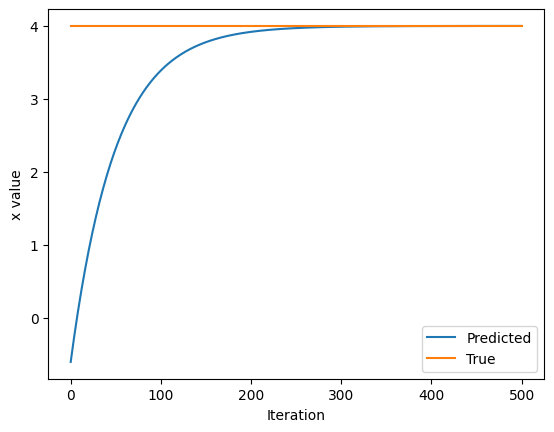

In [29]:
### Function minimization with autograd and gradient descent ###

# Initialize a random value for our intial x
x = torch.randn(1)
print(f"Initializing x={x.item()}")

learning_rate = 1e-2  # Learning rate
history = []
x_f = 4  # Target value


# We will run gradient descent for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the update.
for i in range(500):
    x = torch.tensor([x], requires_grad=True)
    display(f"value of x: {x}, value of i: {i}")
    # TODO: Compute the loss as the square of the difference between x and x_f
    loss = (x - x_f) ** 2

    # Backpropagate through the loss to compute gradients
    l = loss.backward()
    display(f"current loss computation at stage {i + 1} is {l}")
    # Update x with gradient descent
    x = x.item() - learning_rate * x.grad
    display(f"updated x: {x} at stage {i+1}")
    history.append(x.item())
    display(f"current history of values at stage {i + 1} is {history}")

# Plot the evolution of x as we optimize toward x_f!
plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()


Now, we have covered the fundamental concepts of PyTorch -- tensors, operations, neural networks, and automatic differentiation. Fire!!
